In [ ]:
import google.colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if IN_COLAB:
    sys.path.append('/content/drive/MyDrive/Lid_Driven_Cavity')

Total Simulation Time :  91.77 seconds


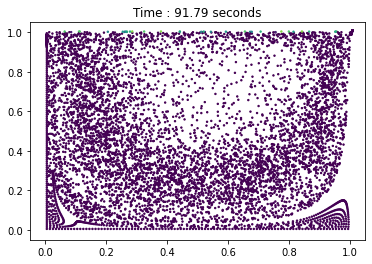

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from matplotlib import animation

if IN_COLAB:
    u = np.load('/content/drive/MyDrive/Lid_Driven_Cavity/Solution_5_U.npy')
    v = np.load('/content/drive/MyDrive/Lid_Driven_Cavity/Solution_5_V.npy')

else:
    u = np.load('Solution_5_U.npy')
    v = np.load('Solution_5_V.npy')


M = u.shape[1] - 2

Dx = Dy = 1.0 / M

Dt = 0.01

# M x M cells
x = np.linspace(Dx/2, 1 - Dx/2, M)
y = np.linspace(Dy/2, 1 - Dy/2, M)

def interpolate_from_vector_field(f, X, Y) :

    cell_x = X / Dx
    cell_y = Y / Dy

    # North East Index
    i_NE = [np.array(np.ceil(cell_x), dtype=int),    np.array(np.ceil(cell_y), dtype=int)]

    # North West Index
    i_NW = [np.array(np.floor(cell_x), dtype=int),   np.array(np.ceil(cell_y), dtype=int)]

    # South West Index
    i_SW = [np.array(np.floor(cell_x), dtype=int),   np.array(np.floor(cell_y), dtype=int)]

    # South East Index
    i_SE = [np.array(np.ceil(cell_x), dtype=int),    np.array(np.floor(cell_y), dtype=int)]

    # Distance from west boundary
    dist_w = X - np.floor(cell_x) * Dx

    # Distance from south boundary
    dist_s = Y - np.floor(cell_y) * Dy

    north_val = ( f[i_NW[0], i_NW[1]] * (Dx - dist_w) + f[i_NE[0], i_NE[1]] * dist_w ) / Dx
    south_val = ( f[i_SW[0], i_SW[1]] * (Dx - dist_w) + f[i_SE[0], i_SE[1]] * dist_w ) / Dx

    return (north_val * dist_s + south_val * (Dy - dist_s)) / Dy

X, Y = np.meshgrid(x, y, indexing='ij')

X = X.flatten()
Y = Y.flatten()

fig, ax = plt.subplots()

points = ax.scatter(X, Y, s=2)

ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])

ax.set_title('Time : 00.00 seconds')

my_cmap = cm.get_cmap('viridis', 12)

T = 0.0

def update(n):

    global X, Y, T

    T += Dt

    # print(interpolate_from_vector_field(u[n], X, Y))
    ax.set_title('Time : ' + '{:4.2f}'.format(T) + ' seconds')

    u_vel = interpolate_from_vector_field(u[n], X, Y)
    v_vel = interpolate_from_vector_field(v[n], X, Y)

    X += u_vel * Dt
    Y += v_vel * Dt

    V = (u_vel**2 + v_vel**2)**0.5

    points.set_offsets(np.column_stack((X, Y)))
    points.set_color(my_cmap(V))

    return points,

print ('Total Simulation Time : ', u.shape[0]*Dt, 'seconds')

#plt.rcParams['animation.ffmpeg_path']='C:/ffmpeg/bin/ffmpeg.exe'
ani = FuncAnimation(fig, update, u.shape[0], interval=10, blit=False)
#writer=animation.FFMpegWriter(bitrate=500)
ani.save('./Flow_Animation_1.mp4', writer='ffmpeg', fps=100)

In [ ]:
if IN_COLAB:
    !cp ./Flow_Animation_1.mp4 "/content/drive/MyDrive/Lid_Driven_Cavity"